In [1]:
import numpy as np
import netCDF4 as nc
Obs_version = '20241015'
def load_RawObservation(speices):
    indir = '/Volumes/rvmartin/Active/s.siyuan/Projects/PM25_Speices_DL_2023/data/monthly_observation/RawData-{}/'.format(Obs_version)
    infile = indir + '{}_monthly_observations-Threshold5.nc'.format(speices)
    dataset = nc.Dataset(infile)
    obsdata = dataset.variables[speices][:]
    obs_lat = dataset.variables['latitude'][:]
    obs_lon = dataset.variables['longitude'][:]
    return obsdata, obs_lat, obs_lon

In [2]:
NO3_obsdata, NO3_obs_lat, NO3_obs_lon = load_RawObservation('NH4')

In [3]:
January2023_NO3_obsdata = NO3_obsdata[:, (2000-1998)*12 + 0]  # January is month 0
July2023_NO3_obsdata = NO3_obsdata[:, (2000-1998)*12 + 6]    # July is month 6

In [4]:
len(np.where(~np.isnan(January2023_NO3_obsdata))[0]), len(np.where(~np.isnan(July2023_NO3_obsdata))[0])

(1, 18)

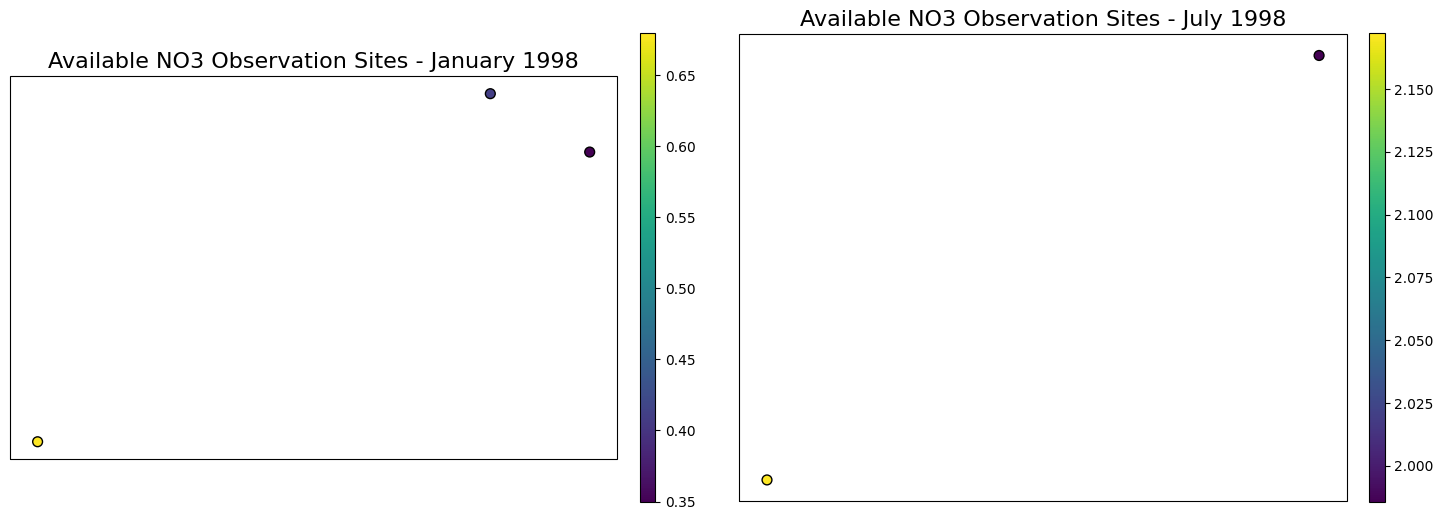

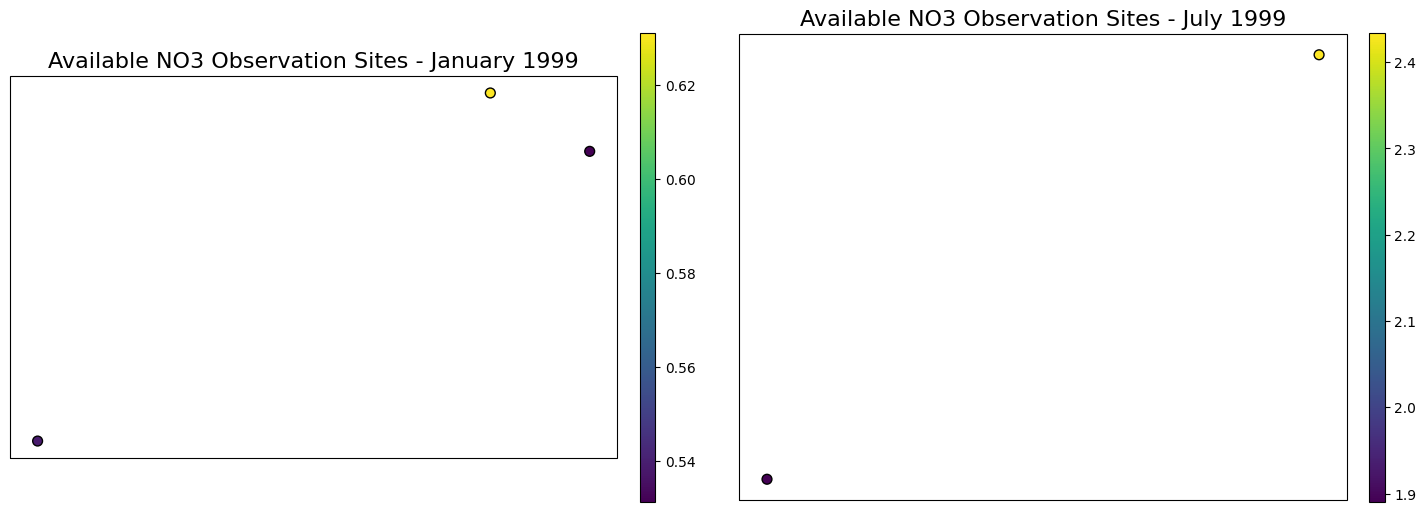

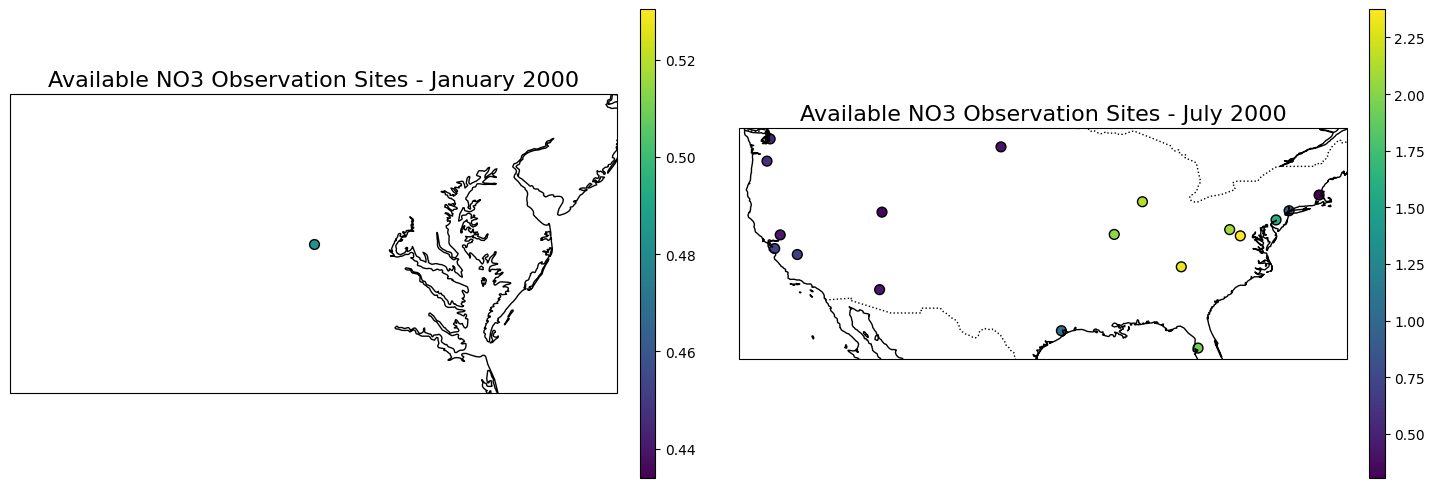

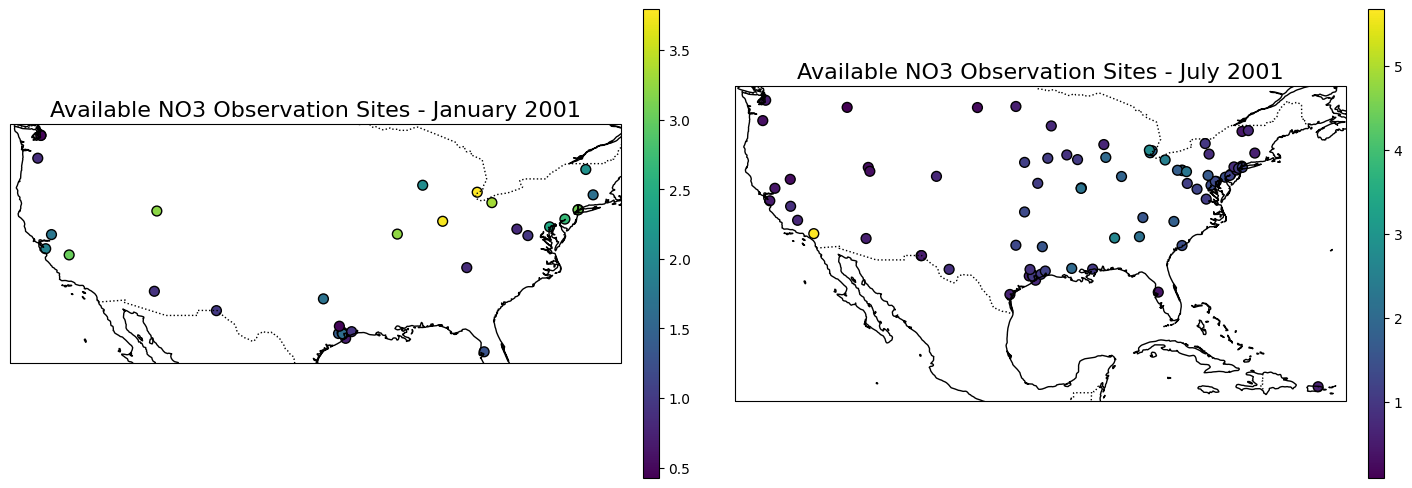

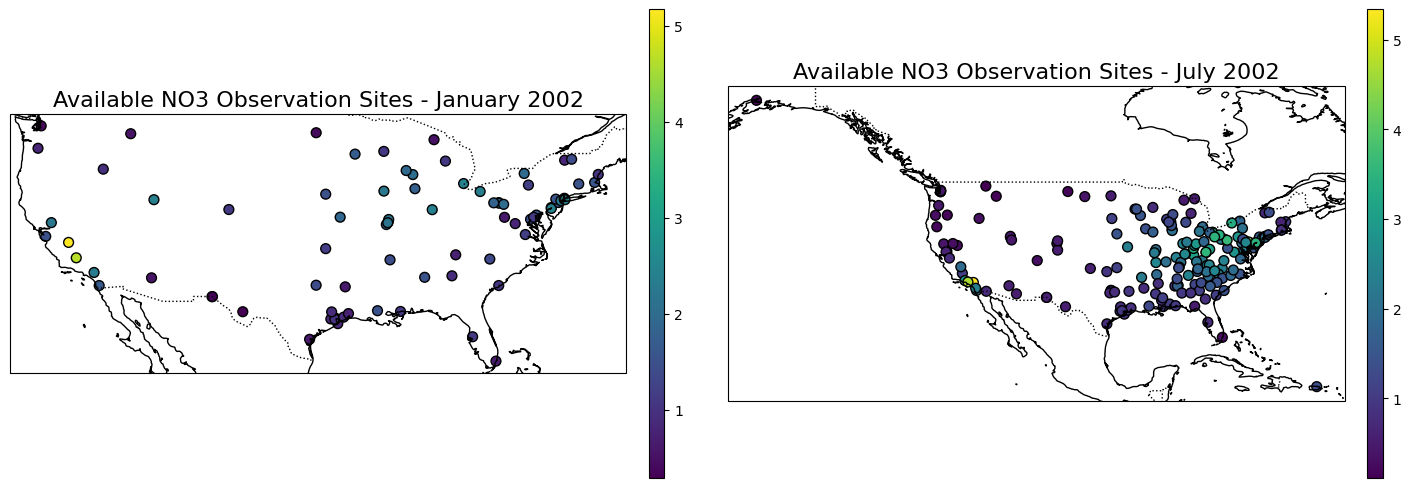

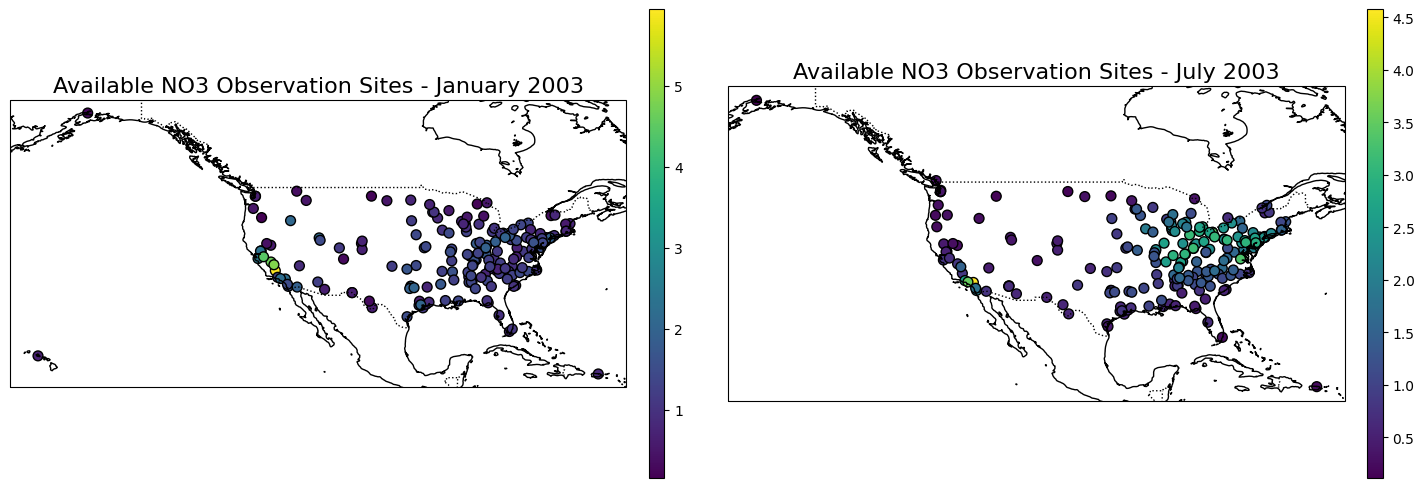

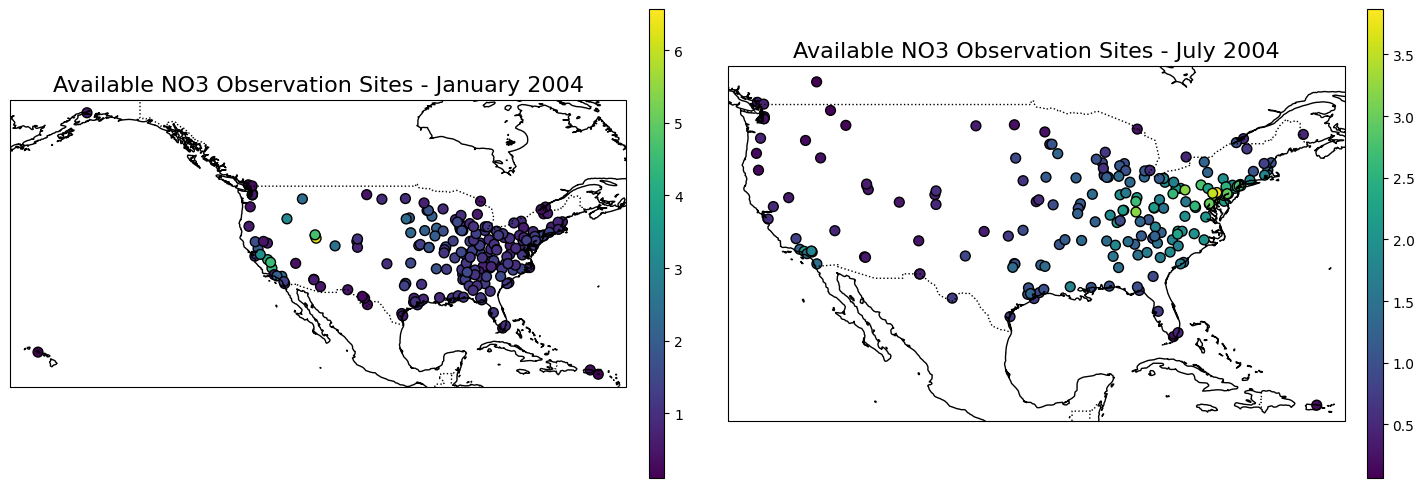

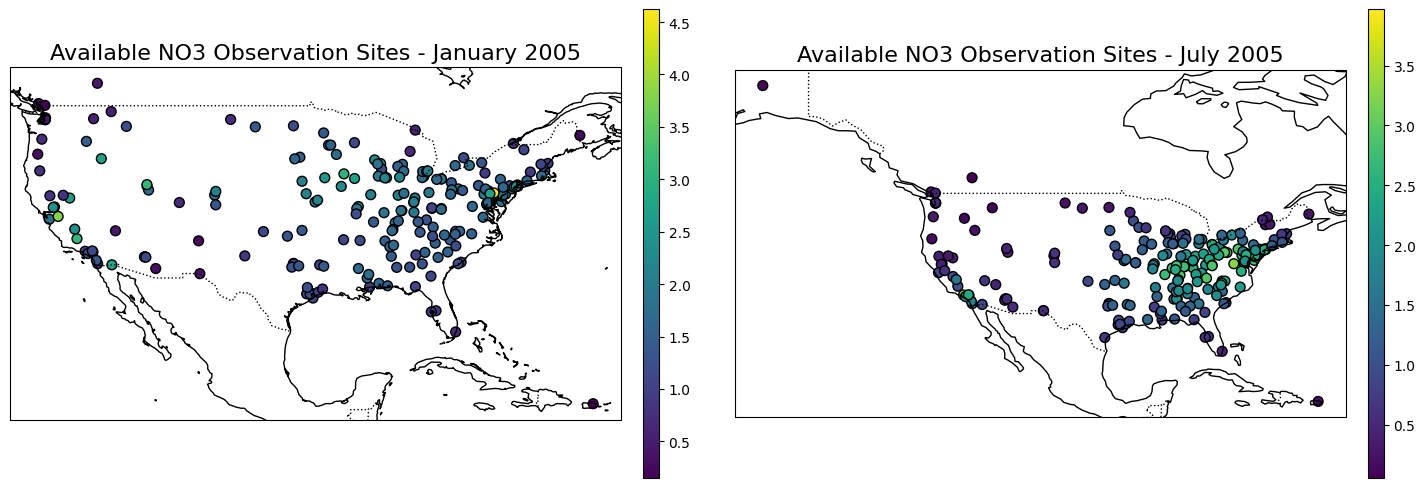

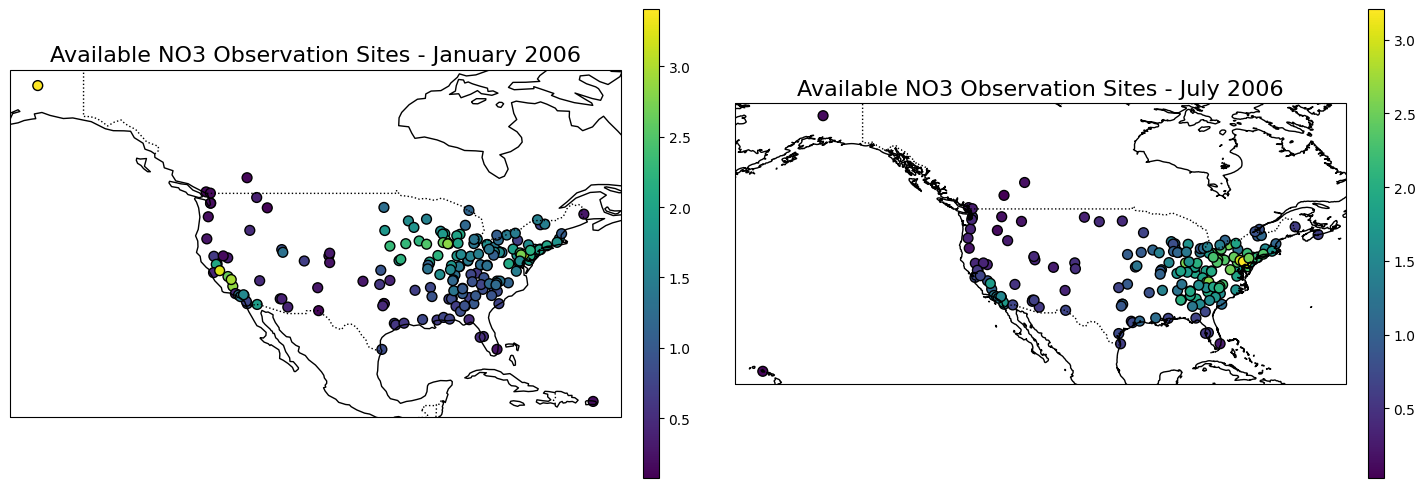

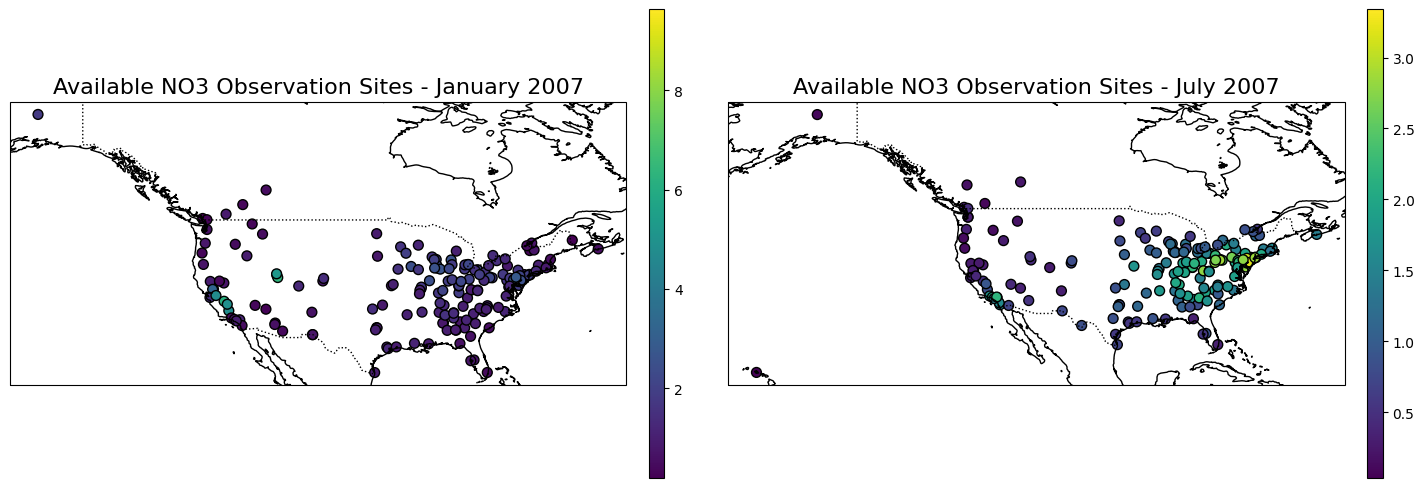

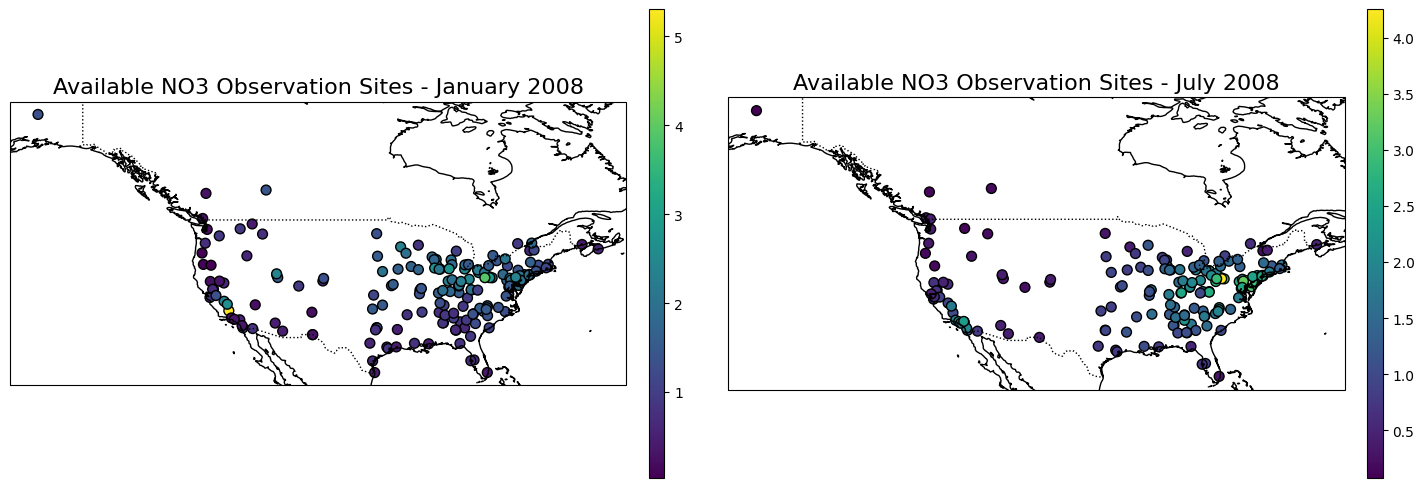

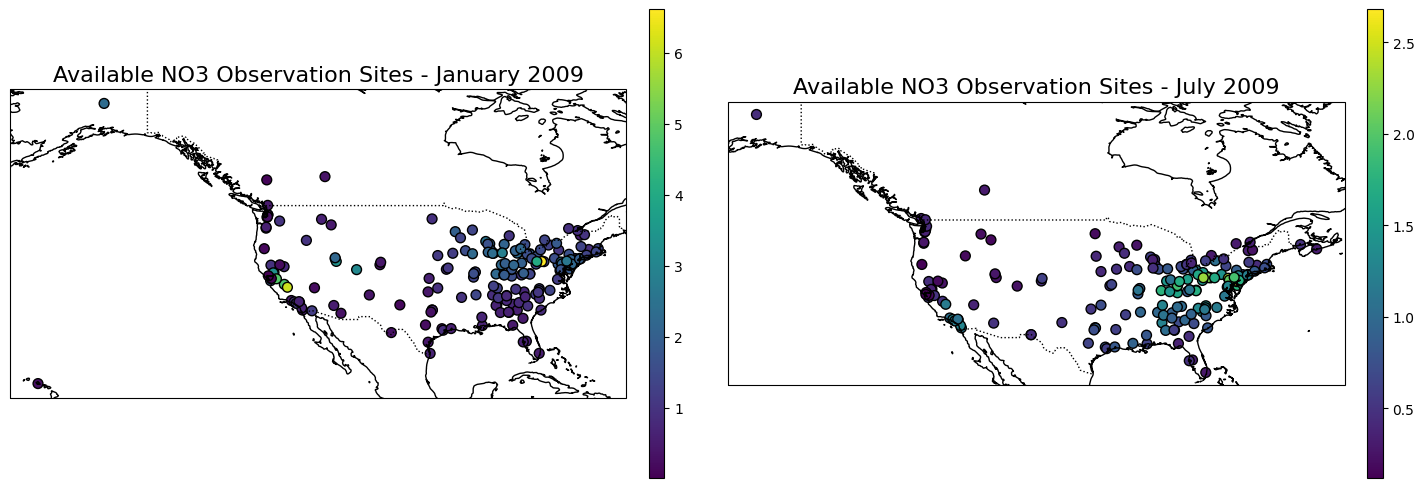

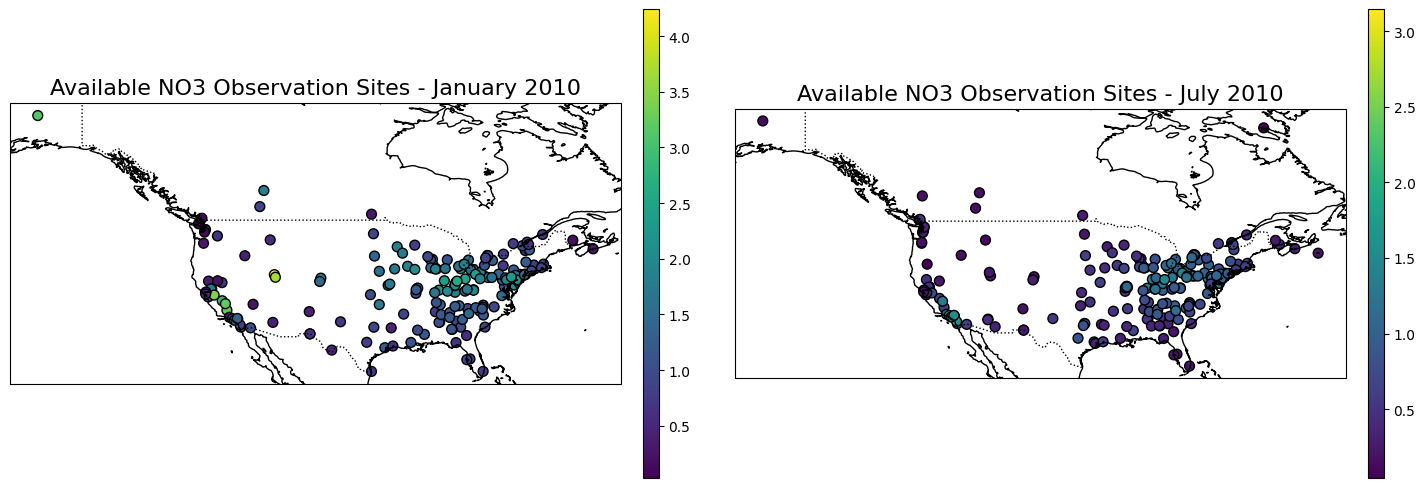

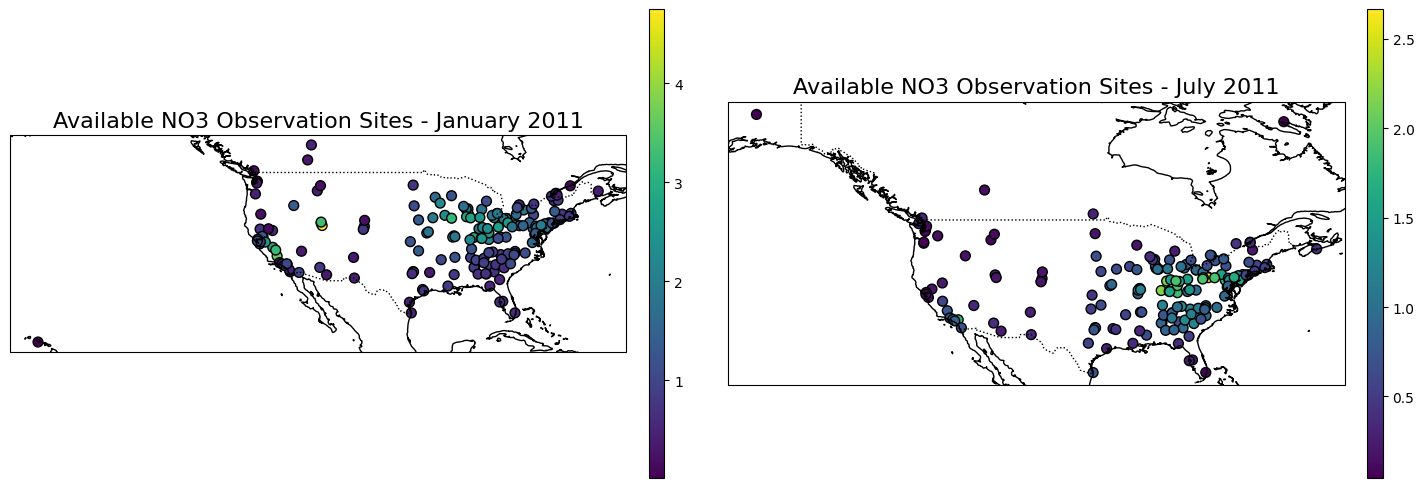

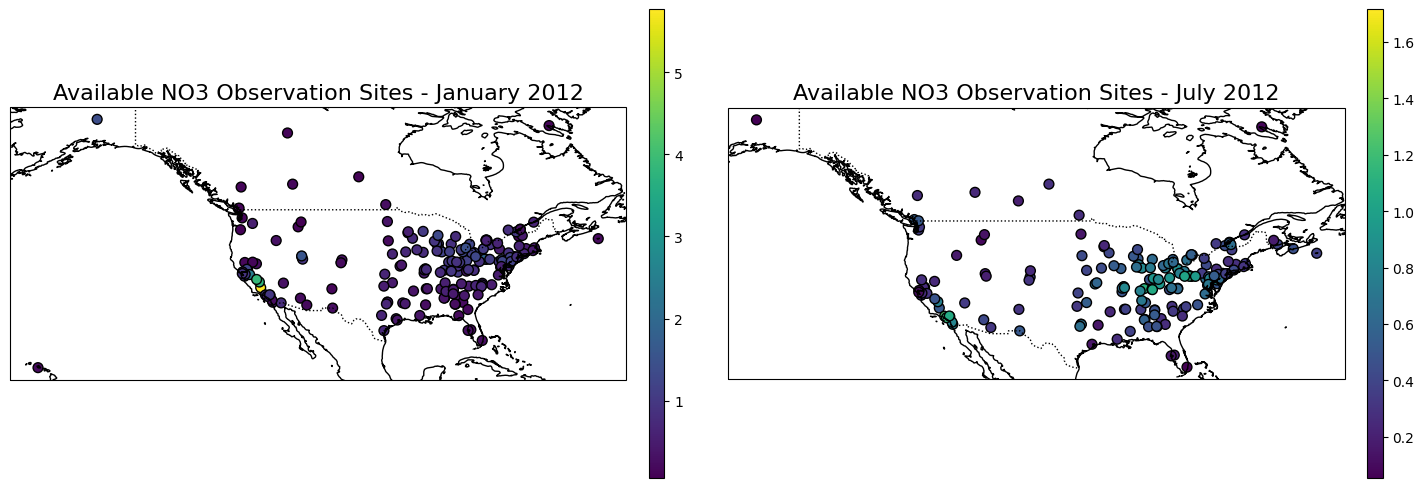

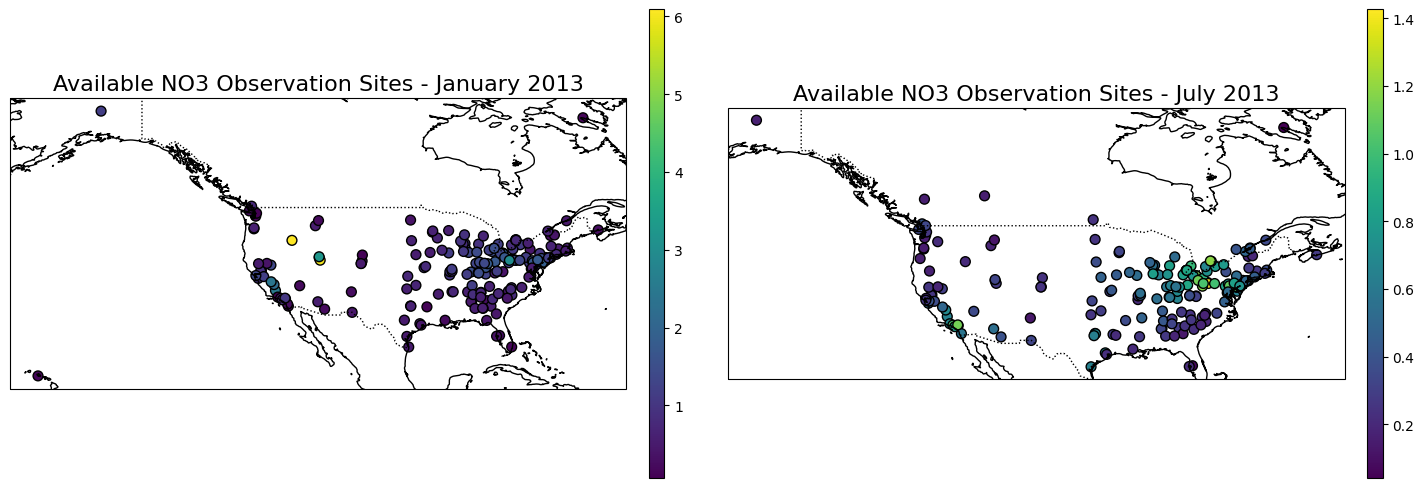

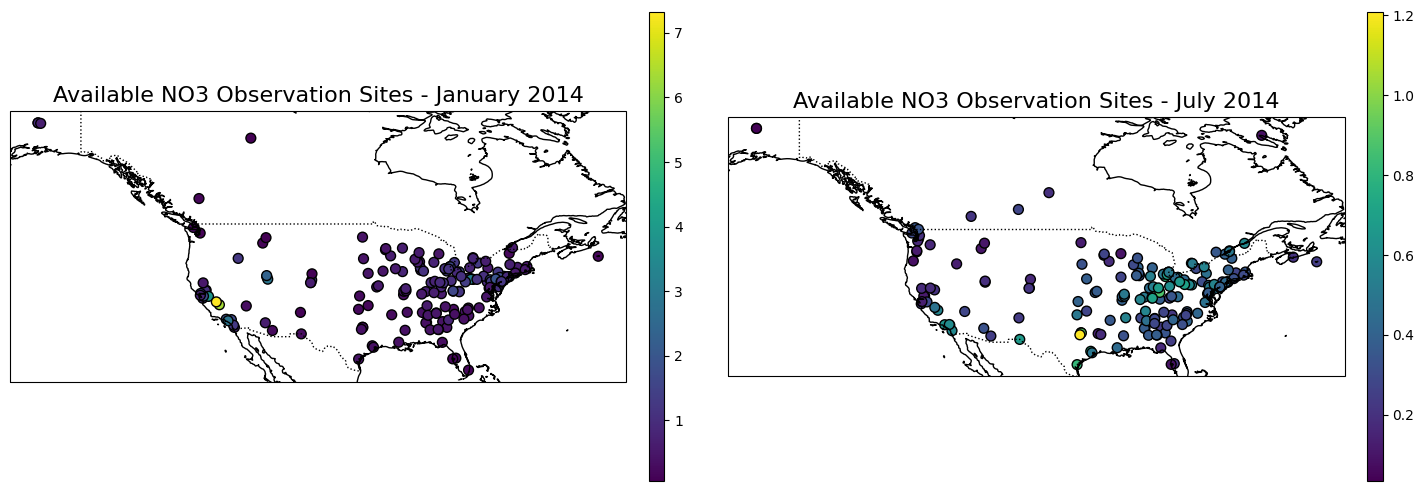

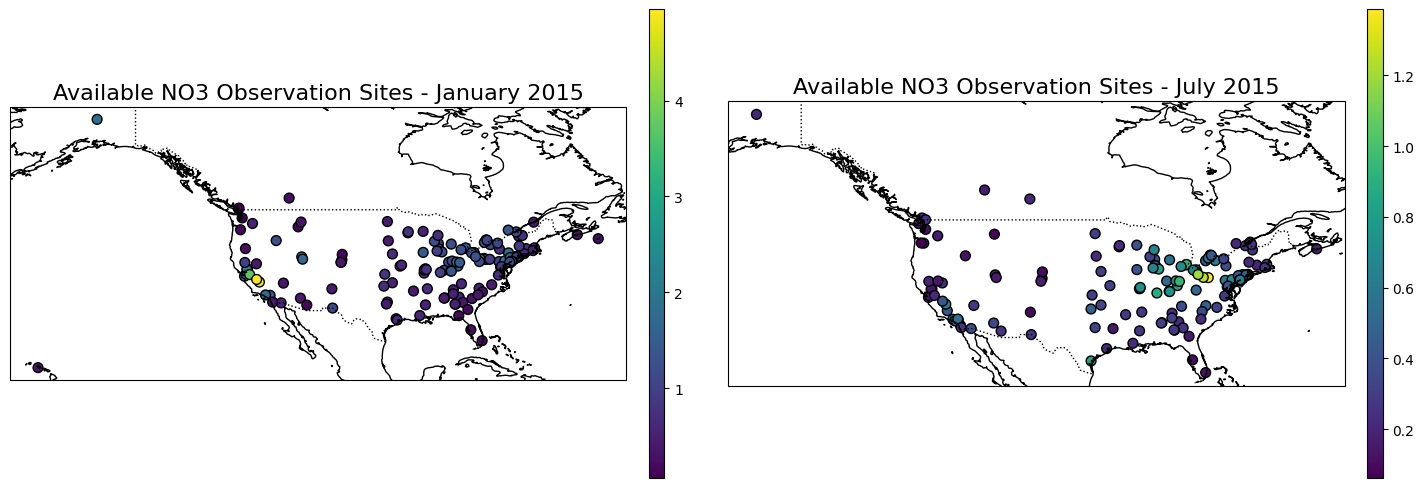

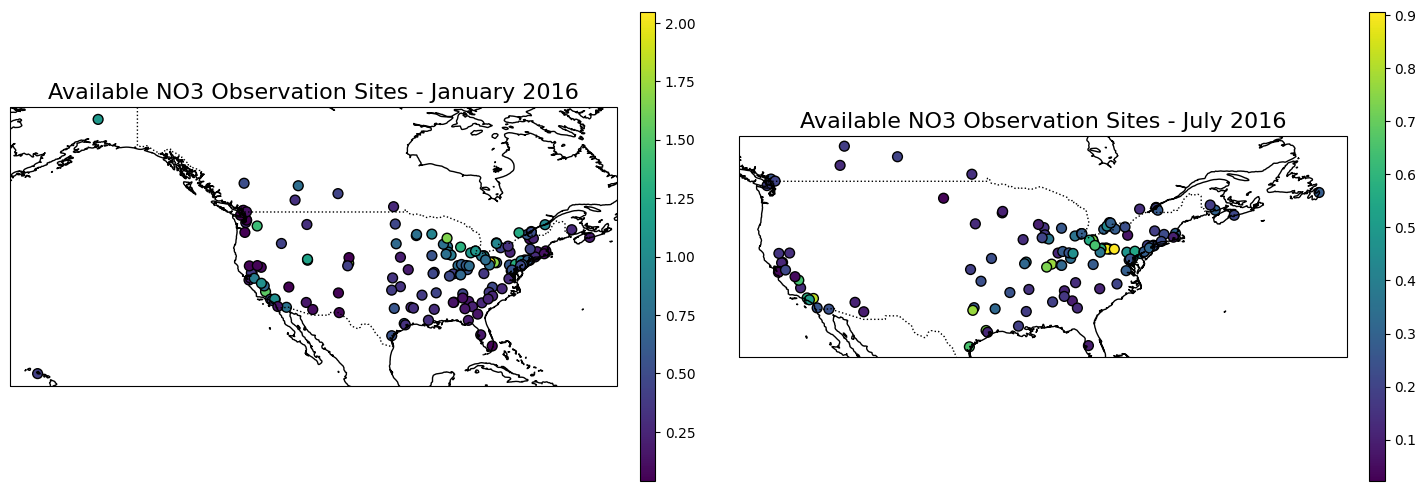

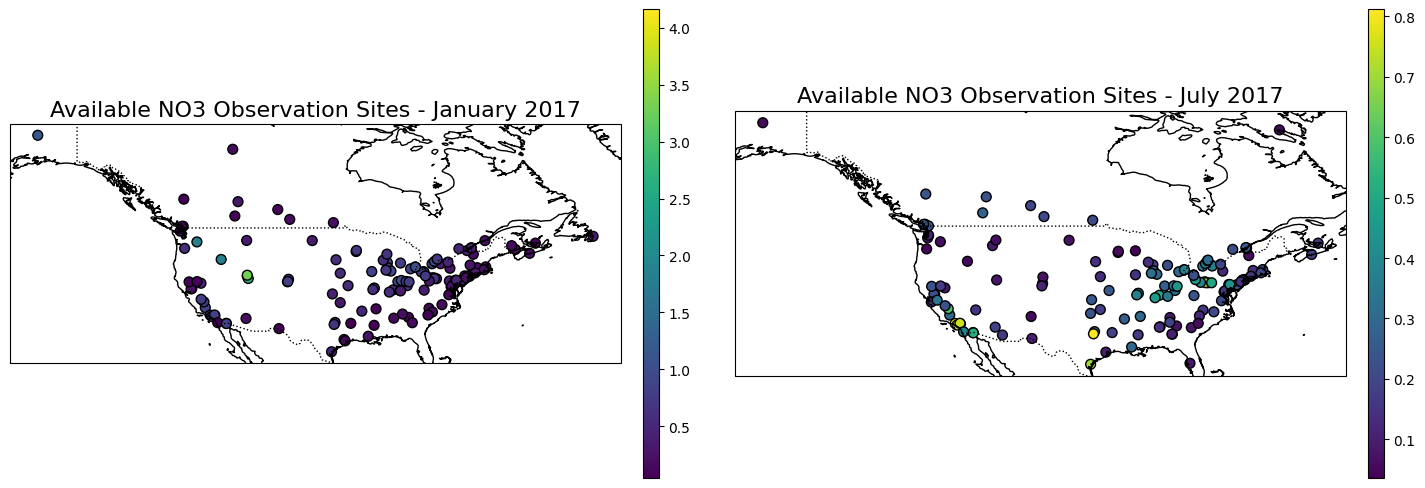

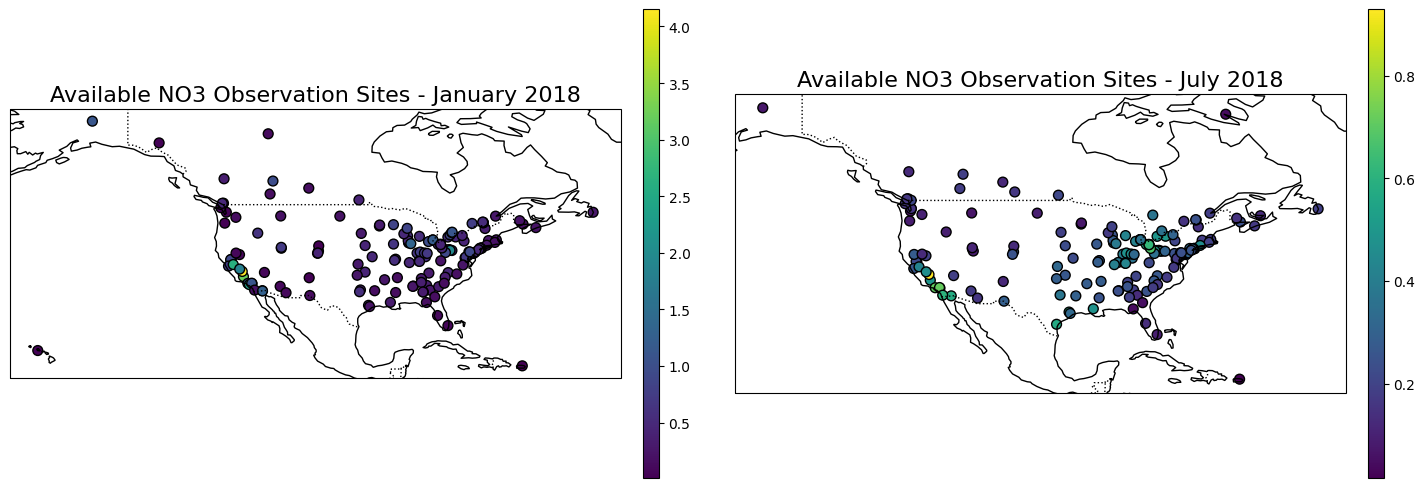

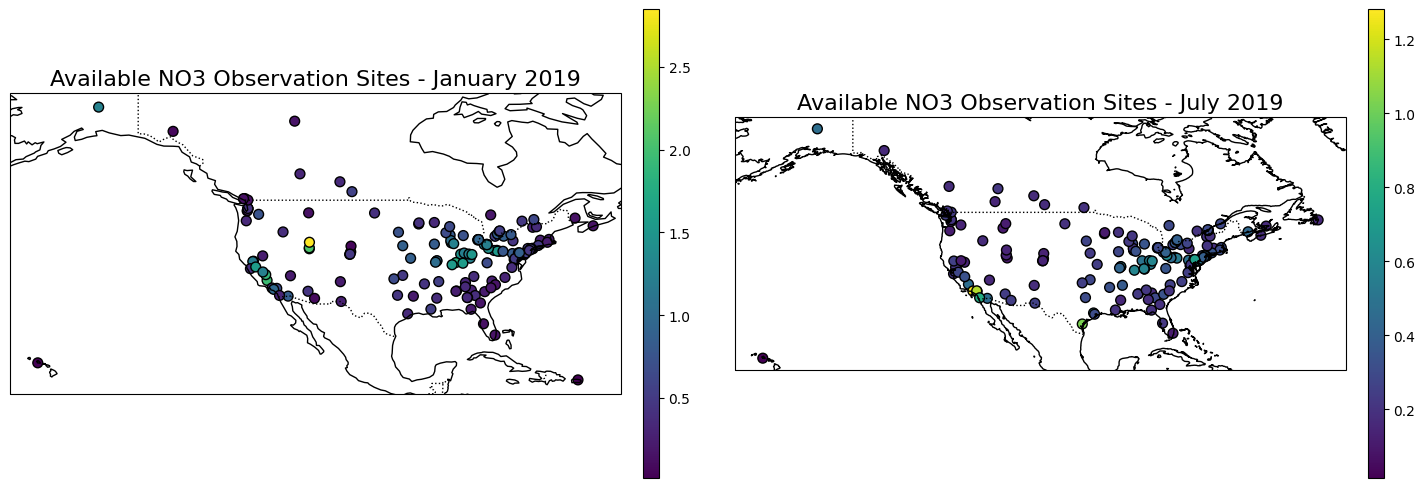

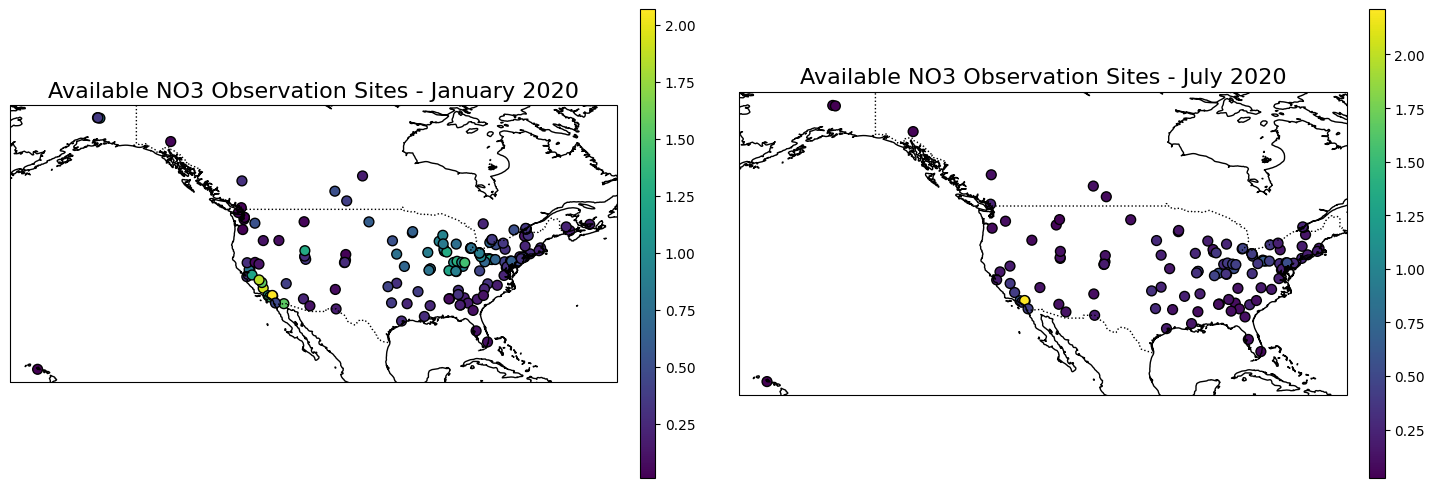

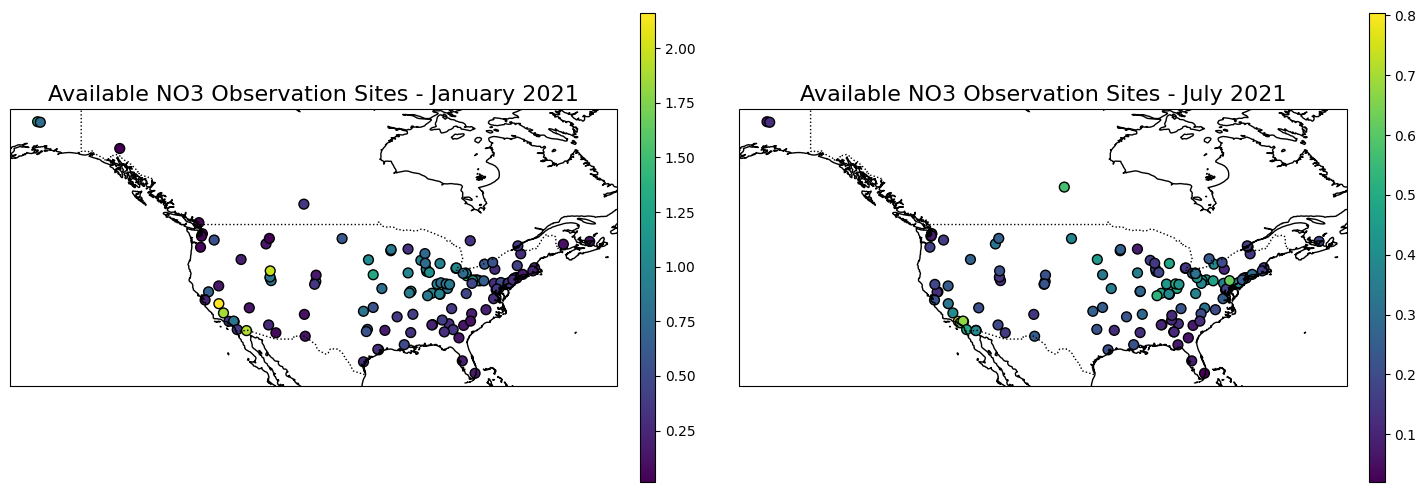

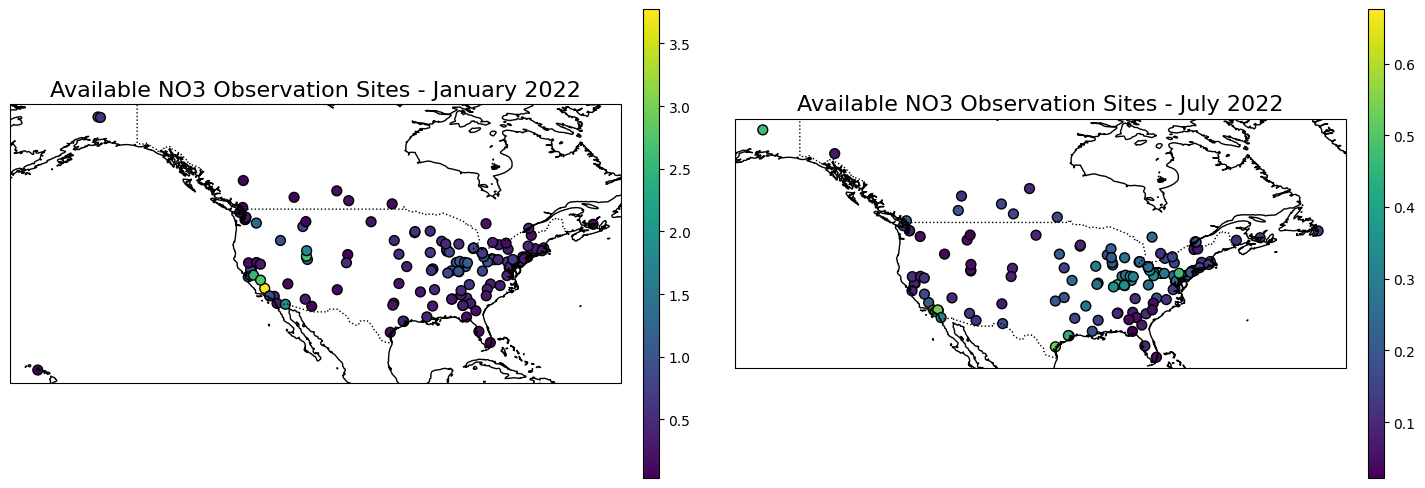

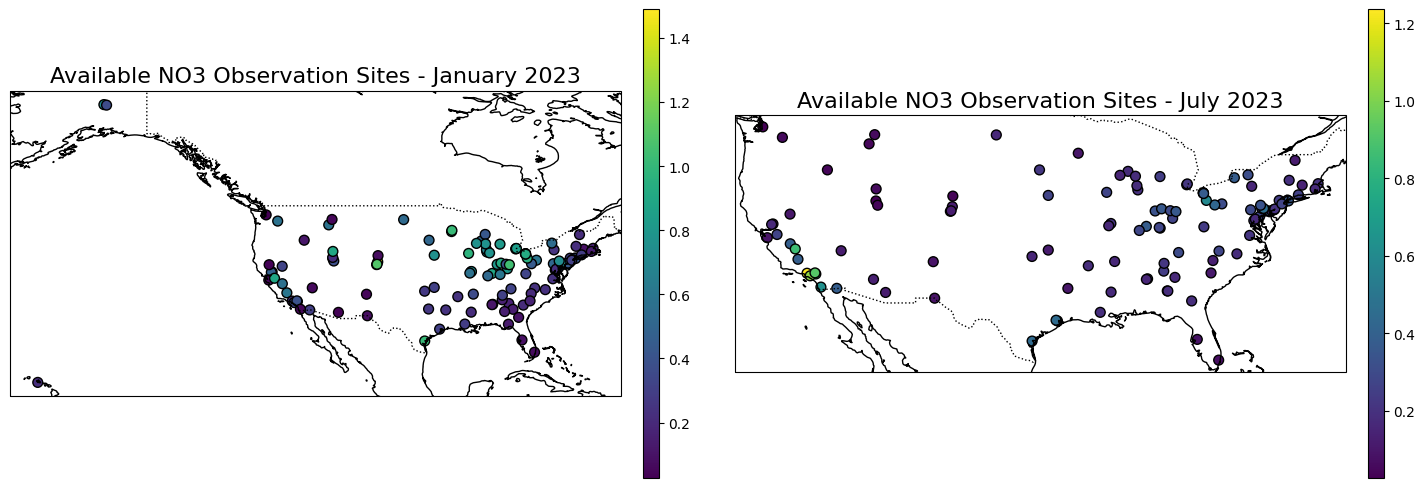

In [5]:
for iyear in range(1998, 2024):
    January2023_NO3_obsdata = NO3_obsdata[:, (iyear-1998)*12 + 0]  # January is month 0
    July2023_NO3_obsdata = NO3_obsdata[:, (iyear-1998)*12 + 6]    # July is month 6

    ### Plot the locations of available obs sites for January and July 2023
    ### Plot map and the values of obs sites
    ### Use cartopy for better map plotting
    ### Plot two plots side by side
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    fig, ax = plt.subplots(1, 2, figsize=(15, 7), subplot_kw={'projection': ccrs.PlateCarree()})
    # January plot
    ax[0].set_title(f'Available NO3 Observation Sites - January {iyear}', fontsize=16)
    ax[0].add_feature(cfeature.COASTLINE)
    ax[0].add_feature(cfeature.BORDERS, linestyle=':')
    sc1 = ax[0].scatter(NO3_obs_lon[~np.isnan(January2023_NO3_obsdata)],
                        NO3_obs_lat[~np.isnan(January2023_NO3_obsdata)],
                        c=January2023_NO3_obsdata[~np.isnan(January2023_NO3_obsdata)],
                        cmap='viridis', s=50, edgecolor='k', transform=ccrs.PlateCarree())
    cbar = plt.colorbar(sc1, ax=ax[0], shrink=0.7, aspect=30, pad=0.03)
    # July plot
    ax[1].set_title(f'Available NO3 Observation Sites - July {iyear}', fontsize=16)
    ax[1].add_feature(cfeature.COASTLINE)
    ax[1].add_feature(cfeature.BORDERS, linestyle=':')
    sc2 = ax[1].scatter(NO3_obs_lon[~np.isnan(July2023_NO3_obsdata)],
                        NO3_obs_lat[~np.isnan(July2023_NO3_obsdata)],
                        c=July2023_NO3_obsdata[~np.isnan(July2023_NO3_obsdata)],
                        cmap='viridis', s=50, edgecolor='k', transform=ccrs.PlateCarree(),)
    cbar = plt.colorbar(sc2, ax=ax[1], shrink=0.7, aspect=30, pad=0.03)
    plt.tight_layout()
    plt.show()